<a href="https://colab.research.google.com/github/choki0715/lecture/blob/master/SVM_rbf_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM Kernel Trick
# Author: Euijoong Kim (aidentify Inc.)
# License: BSD 3 clause

In [75]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#학습 데이터 만들기

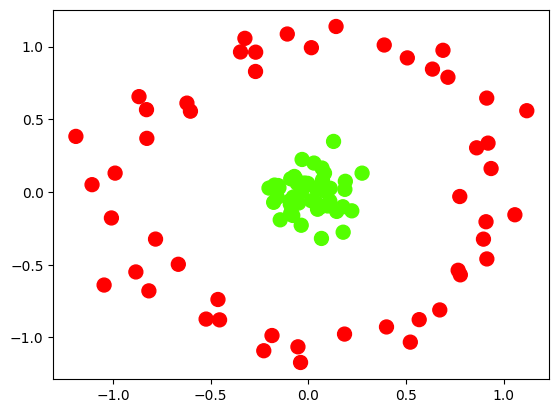

In [76]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=0.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='prism', vmax=1, vmin=0)

# sklearn SVM.SVC 불러오기
# 커널함수
* linear
* polynomial
* sigmoid (tanh)
* rbf (radial basis function): Gaussian

In [77]:
from sklearn.svm import SVC
clf = SVC(kernel='poly', gamma=4, coef0 = 1, degree = 3, C=1000.0)
# 학습
clf.fit(X, y)

SVC(C=1000.0, coef0=1, gamma=4, kernel='poly')

#서포트벡터 그리기

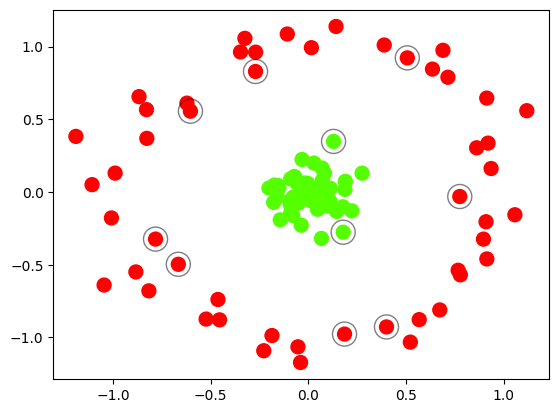

In [78]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='prism', vmax=1, vmin=0)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
             s=300, edgecolors='k', facecolor='none', alpha=0.5);
plt.show()

#서포트벡터 리스트

In [79]:
clf.support_vectors_

array([[ 0.18557056, -0.9769602 ],
       [ 0.50688131,  0.92174164],
       [-0.78161751, -0.32392138],
       [-0.66507904, -0.49716704],
       [-0.60303118,  0.55536391],
       [ 0.77536966, -0.0312568 ],
       [ 0.40034434, -0.92788957],
       [-0.26987203,  0.82833251],
       [ 0.17857675, -0.27658833],
       [ 0.12938012,  0.34750415]])

# SVM으로 활용하기

In [80]:
# 새로운 데이터
X_t = np.array([0.7, 0.7])
X_t = X_t.reshape(1,-1)
y_t = clf.predict(X_t)
print(y_t)

[0]


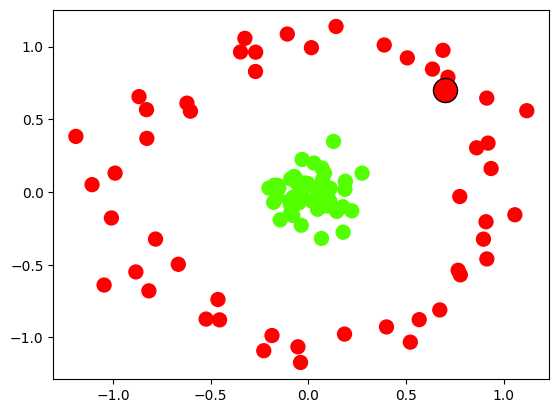

In [81]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='prism', vmax=1, vmin=0)
plt.scatter(X_t[0,0], X_t[0,1], c=y_t, edgecolors='k', s=300, cmap='prism', vmax=1, vmin=0)
#plt.show()

In [ ]:
y

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0])

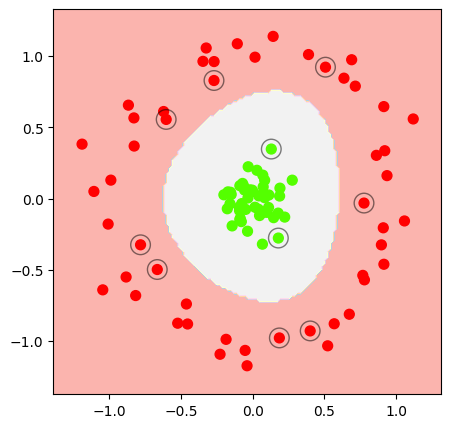

In [93]:
# 예상되는 데이터 영역을 h 크기의 메쉬형태로 구분
h = .02

# 결과를 비교하기 위해 두개 그림을 출력
fig, axs = plt.subplots(1,1, figsize=(5,5))

# 데이터의 최대, 최소 영역을 설정
x_min = X[:, 0].min() - 0.2
x_max = X[:, 0].max() + 0.2

y_min = X[:, 1].min() - 0.2
y_max = X[:, 1].max() + 0.2

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# xx.ravel := xx.reshape(-1) --> 1차원 벡터로 평탄화
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Z를 다시 컨투어 가시과를 위해 메쉬 데이터로 복원
Z_out = Z.reshape(xx.shape)

axs.contourf(xx, yy, Z_out, cmap='Pastel1')

# Plot also the training points
#scatter = axs.scatter(x=X[:, 0], y=X[:, 1], c=y,
#                      alpha=1.0, edgecolor="black")


plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='prism', vmax=1, vmin=0)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
             s=200, edgecolors='k', facecolor='none', alpha=0.5);
plt.show()